In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# посмотрим на распределение целевой переменной
df['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

Целевая переменная несбалансирована.

In [6]:
# прежде чем изучить категориальные переменные, создадим категории для возраста с диапазоном 5 лет.
df['age_cat'] = df['age']//5*5

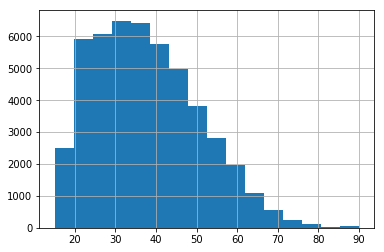

In [7]:
ax = df['age_cat'].hist(bins=16)

In [8]:
# преобразуем все категории >80 лет в одну категорию 80 лет.
df['age_cat'] = df['age_cat'].where(df['age_cat']<80, 80)

In [9]:
df['age_cat'] = df['age_cat'].astype('category')

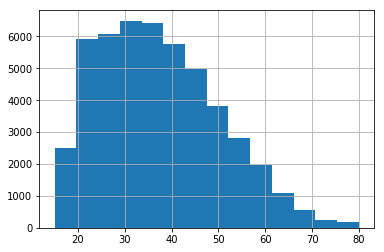

In [10]:
ax = df['age_cat'].hist(bins=14)

In [11]:
trg = 'income'

In [12]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,25


In [13]:
# список категориальных переменных
cat_columns = []
# список числовых переменных
num_columns = []
for col in df.drop(['income', 'age_cat'], axis=1).columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

In [14]:
cat_columns.append('age_cat')

In [15]:
def plot_countplot(df, trg, cat_columns):
    '''
    Функция для печати countplot с указанием процентной доли целевой переменной
    для каждой категории категориальных признаков. По оси X используется логарифмическая
    шкала, т.к. разные категории имеют очень разное количество наблюдений.
    '''
    # numpy array с количеством категорий каждого признака
    num_of_cat = np.array([])
    for cat in cat_columns:
        num_of_cat = np.append(num_of_cat, df[cat].nunique())
    # список с нормализованным количеством категорий каждого признака.
    # список необходим для отображения графикоф для каждого признака
    # приблизительно в одном масштабе и передается в 
    # plt.subplots(gridspec_kw = {'height_ratios': num_of_cat_norm}
    num_of_cat_norm = list(num_of_cat/num_of_cat.min())
    
    fig, axes = plt.subplots(ncols = 1, nrows=len(cat_columns), 
                    figsize=(12, 0.7*sum(num_of_cat)),
                    gridspec_kw = {'width_ratios': [1],
                                    'height_ratios': num_of_cat_norm})

    for i, col in enumerate(cat_columns):
        plt.setp(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_xscale('symlog')
        sns.countplot(y = col, hue=trg, data=df, ax=axes[i])
        plt.subplots_adjust(hspace=0.1)
        axes[i].legend(loc=4, shadow=True)

        bars = axes[i].patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            width_l = left.get_width()
            if pd.isna(width_l):
                width_l = 0
            width_r = right.get_width()
            if pd.isna(width_r):
                width_r = 0
            total = width_l + width_r
            if df[col].nunique()>10:
                axes[i].text(width_l+1, left.get_y() + left.get_height()*0.7, '{0:.0%}'.format(width_l/total), ha="left")
                axes[i].text(width_r+1, right.get_y() + right.get_height()*0.7, '{0:.0%}'.format(width_r/total), ha="left")
            else:
                axes[i].text(width_l+1, left.get_y() + left.get_height()*0.7, '{0:.0%}'.format(width_l/total), ha="left")
                axes[i].text(width_r+1, right.get_y() + right.get_height()*0.7, '{0:.0%}'.format(width_r/total), ha="left")

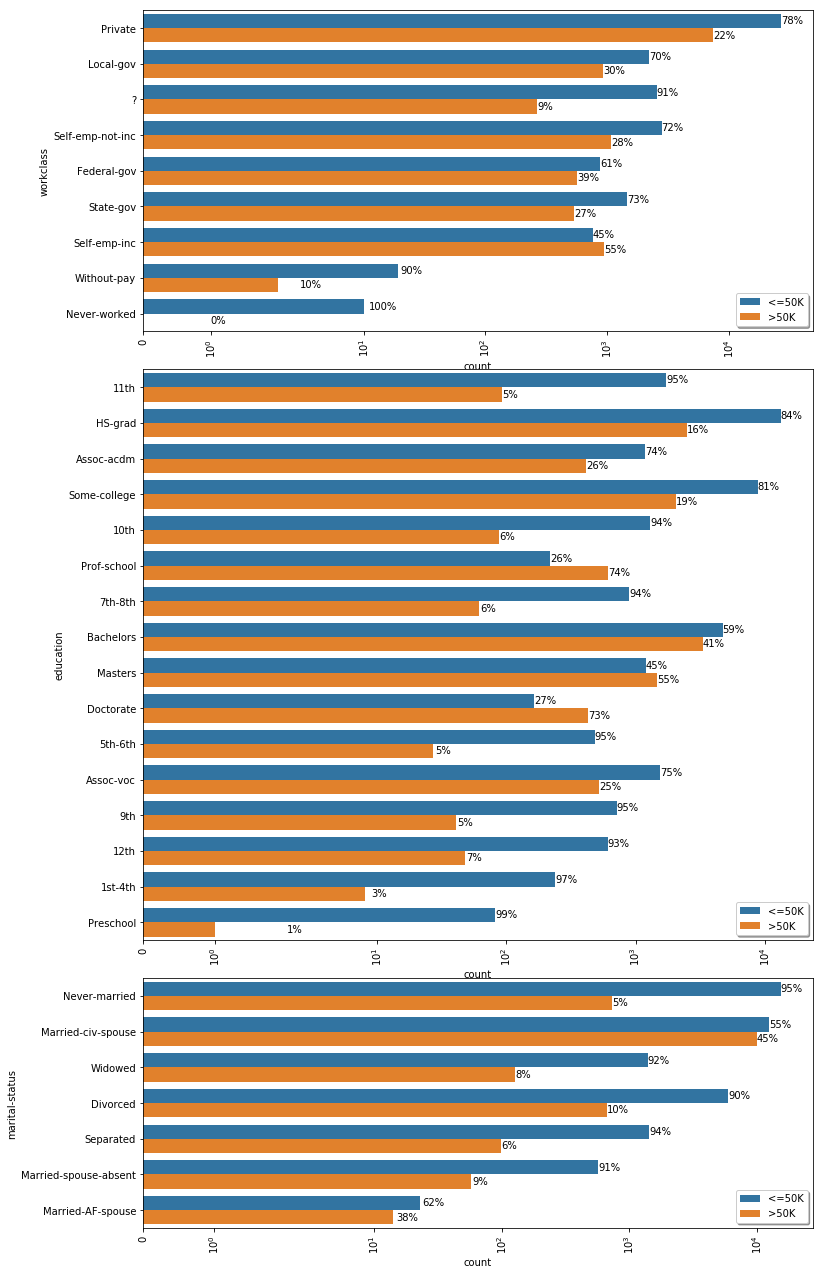

In [209]:
plot_countplot(df, trg, cat_columns[:3])

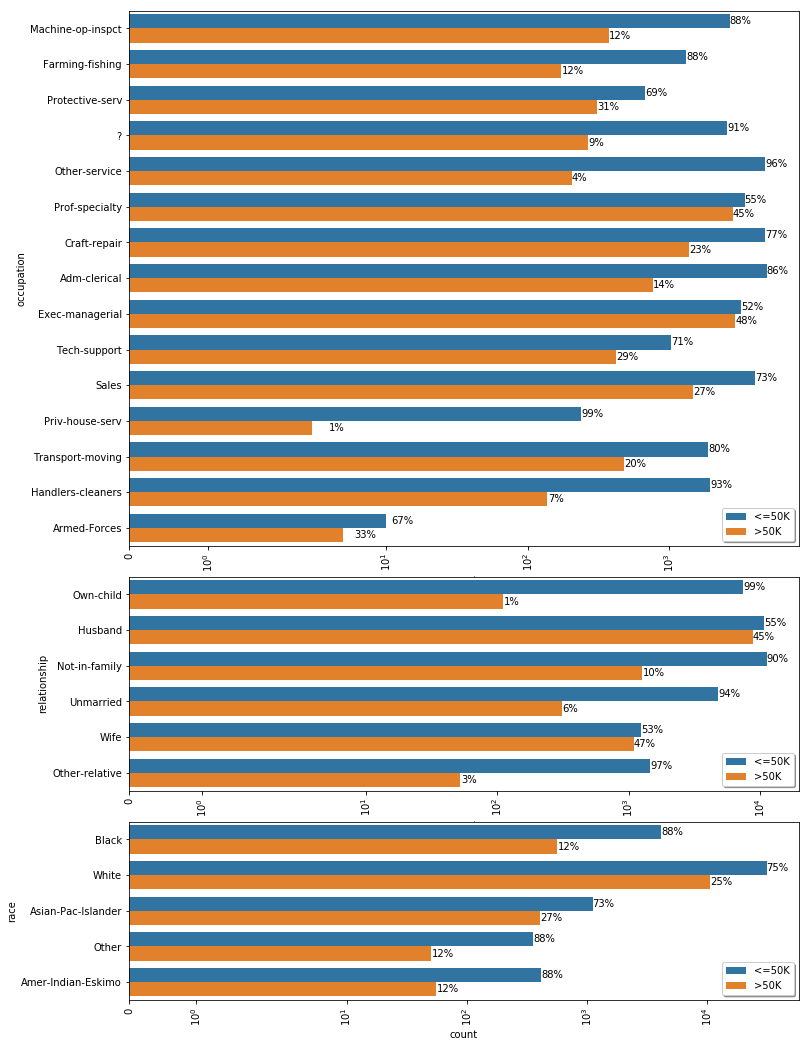

In [210]:
plot_countplot(df, trg, cat_columns[3:6])

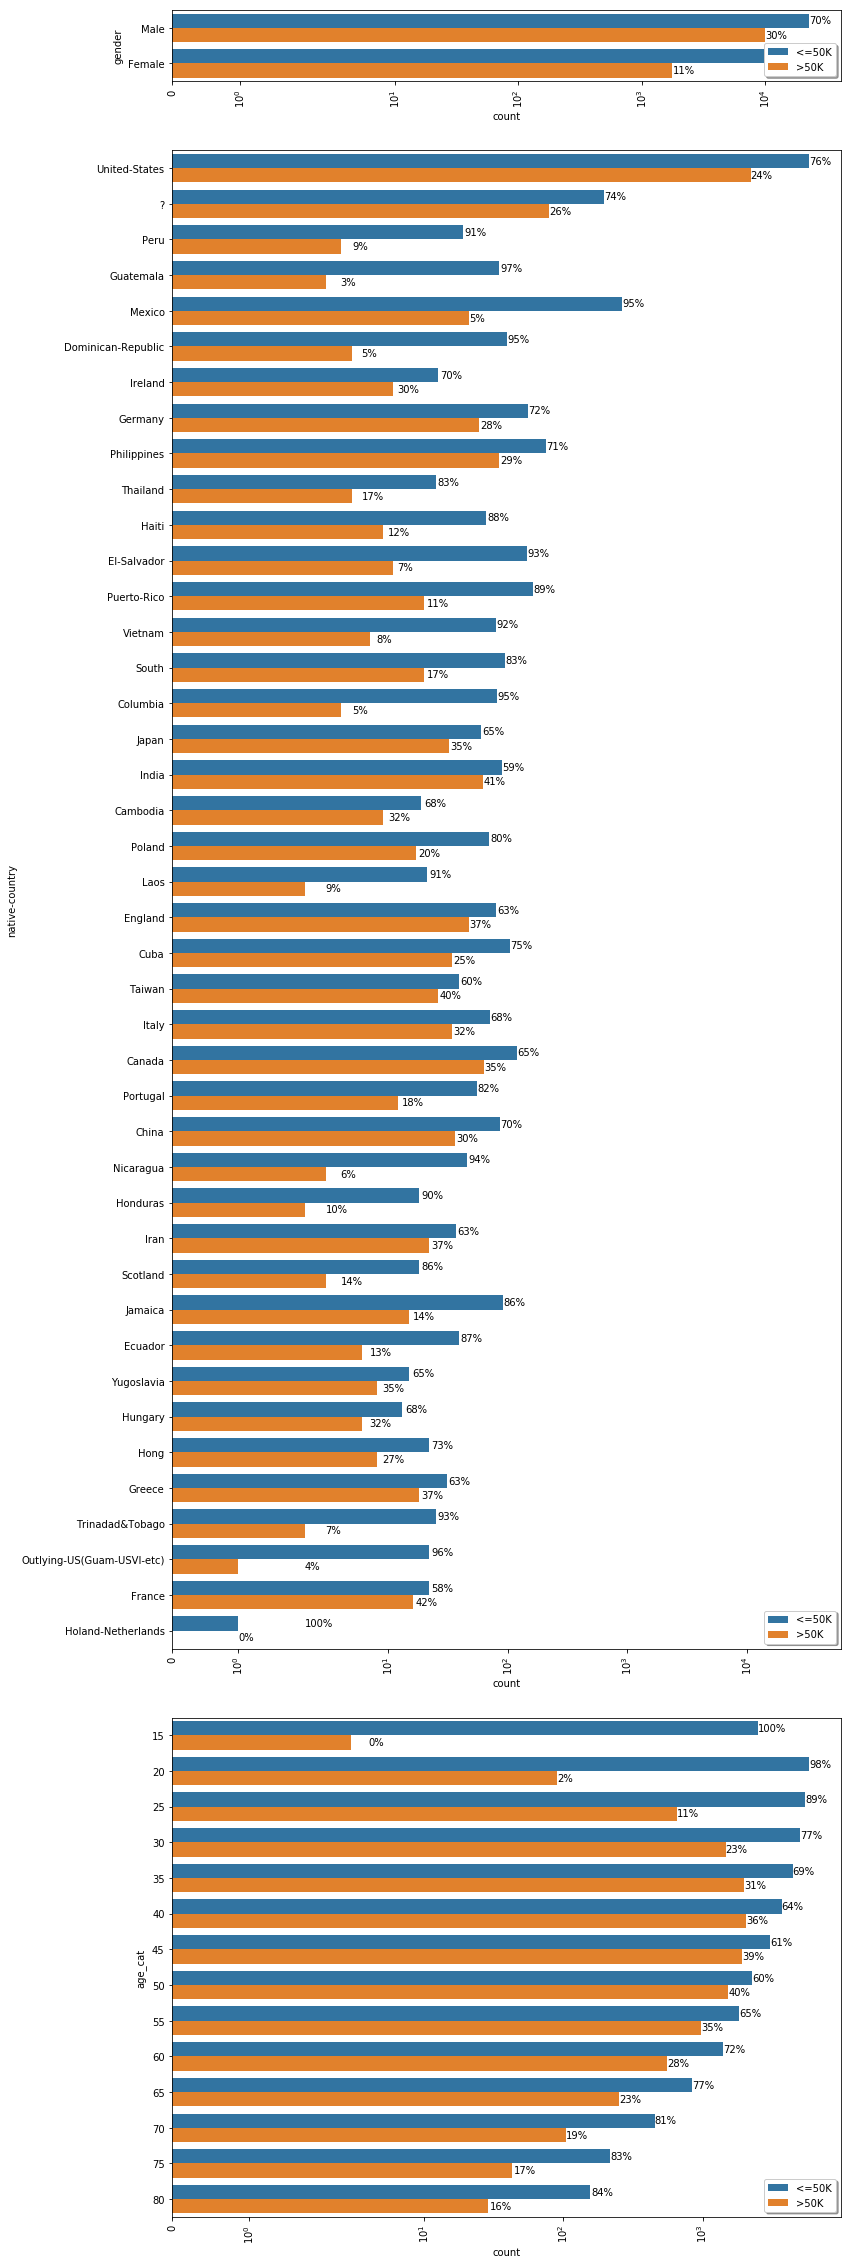

In [211]:
plot_countplot(df, trg, cat_columns[6:])

Судя по графикам, все переменные довольно сильно влияют на целевую переменную,особенно: образование, пол, возраст.

Также у некоторых признаков есть категории помеченные '?'. Переименуем их.

In [16]:
feat_with_question = [col for col in df.columns if '?' in set(df[col].unique())]
feat_with_question

['workclass', 'occupation', 'native-country']

In [17]:
for feature in feat_with_question:
    df.loc[df[feature]=='?', feature] = feature + '_other'

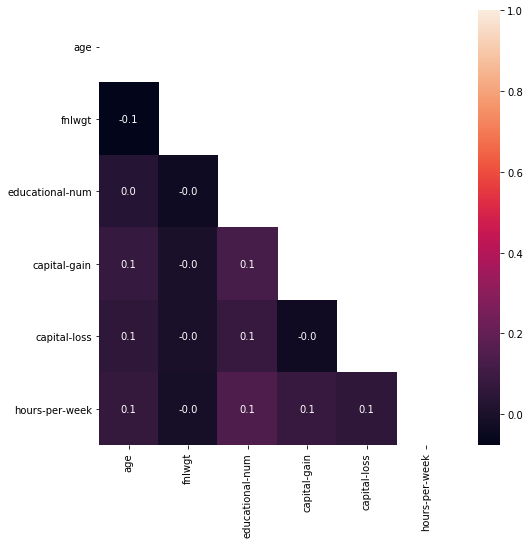

In [245]:
# Посмотрим на корреляцию числовых признаков
corr = df[num_columns].corr()

plt.figure(figsize = (8,8))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

ax = sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Линейная корреляция числовых признаков - отсутствует

<Figure size 864x864 with 0 Axes>

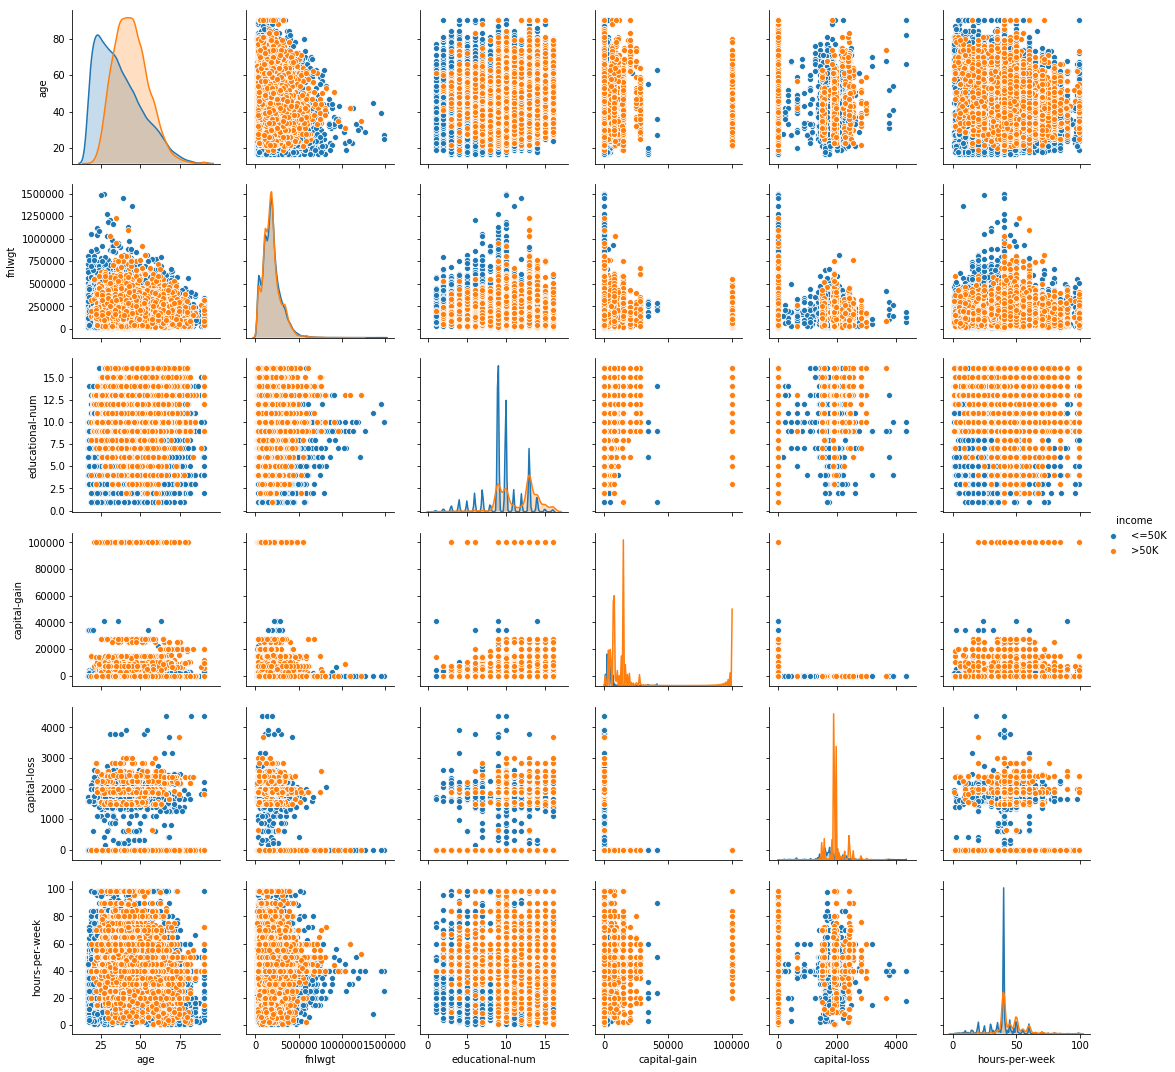

In [247]:
# посмотрим, как связаны числовые признаки с помощью scatterplot
fig = plt.figure(figsize=(12, 12))
ax = sns.pairplot(df[num_columns+[trg]], hue=trg)

Каких-либо взаимосвязей признаков не наблюдается.

In [18]:
# преобразуем целевую переменную и признак 'gender' в бины
df[trg] = df[trg].map({'>50K': 1, '<=50K': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_cat'],
      dtype='object')

In [20]:
# удалим ненужные признаки
df.drop(['age', 'educational-num'], axis=1, inplace=True)

In [21]:
df.head()

,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,25
1,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,35
2,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,25
3,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,40
4,workclass_other,103497,Some-college,Never-married,occupation_other,Own-child,White,0,0,0,30,United-States,0,15


In [22]:
df.columns

Index(['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'age_cat'],
      dtype='object')

In [23]:
# преобразуем категориальные переменные
X = pd.get_dummies(df.drop(trg, axis=1), cat_columns.remove('gender'))

In [24]:
y = df[trg]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X.shape, y.shape

((48842, 119), (48842,))

In [27]:
# создадим стратифицированное разделение на обучающий и тестовый наборы по целевой переменной.
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
from sklearn.model_selection import StratifiedKFold

In [99]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train, y_train)

5

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [101]:
X_train.shape

(39073, 119)

In [207]:
# чтобы избежать утечки информации, отбор признаков и масштабирование будет
# осуществляться внутри перекрестной проверки. Отбор признаков будет 
# проводится с помощью рекурсивного удаления неважных признаков RFE, 
# использующего RandomForestClassifier для определения важности признаков.
np.random.seed(8)

location = '.\cachedir'
memory = Memory(location, verbose=10)

pipeline_lr = Pipeline([
    ('feature_selection', RFE(RandomForestClassifier(n_estimators=10), step=10)),
    ('std_scaler', StandardScaler()),
    ('lr',  LogisticRegression(solver='liblinear'))], 
    memory
)

grid_lr = {      
        'lr__C': np.logspace(-3, 3, 7),
        'lr__penalty': ['l1', 'l2'],
        }

grid_search_lr = GridSearchCV(pipeline_lr, param_grid=grid_lr, cv=skf, scoring='f1', verbose=10, n_jobs=-1)

In [ ]:
grid_search_lr.fit(X_train, y_train)

In [282]:
top_features_lr = X_train.columns[grid_search_lr.best_estimator_.named_steps['feature_selection'].support_]
top_features_lr_rate = grid_search_lr.best_estimator_.named_steps['feature_selection'].ranking_
top_features_lr

Index(['fnlwgt', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'education_10th', 'education_11th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupati

In [283]:
top_features_df = pd.DataFrame({'top_features_lr':top_features_lr})
top_features_df

,top_features_lr
0,fnlwgt
1,gender
2,capital-gain
3,capital-loss
4,hours-per-week
5,workclass_Federal-gov
6,workclass_Local-gov
7,workclass_Private
8,workclass_Self-emp-inc
9,workclass_Self-emp-not-inc


In [209]:
grid_search_lr.best_score_

0.6655941751854987

In [211]:
grid_search_lr.best_params_

{'lr__C': 10.0, 'lr__penalty': 'l1'}

In [212]:
results_lr = grid_search_lr.cv_results_

In [213]:
score_keys_lr = [key for key in results_lr.keys() if 'split' in key and 'test' in key]
score_keys_lr

['split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score']

In [214]:
params_dct_lr = {'cv_result_'+str(i): result for i, result in enumerate(
    np.array([results_lr[score] for score in score_keys_lr]))}

In [215]:
params_dct_lr['model_params'] = results_lr['params']

In [216]:
results_df_lr = pd.DataFrame(params_dct_lr)

In [217]:
results_df_lr['mean_result'] = results_df_lr.mean(axis=1)
results_df_lr['std_result'] = results_df_lr.std(axis=1)

In [218]:
results_df_lr.sort_values('mean_result', ascending=False).head(5)

,cv_result_0,cv_result_1,cv_result_2,cv_result_3,cv_result_4,model_params,mean_result,std_result
8,0.687719,0.651479,0.671172,0.676445,0.641148,"{'lr__C': 10.0, 'lr__penalty': 'l1'}",0.665593,0.016942
11,0.687719,0.651479,0.671172,0.676445,0.640957,"{'lr__C': 100.0, 'lr__penalty': 'l2'}",0.665555,0.016998
13,0.687719,0.651479,0.671172,0.676445,0.640957,"{'lr__C': 1000.0, 'lr__penalty': 'l2'}",0.665555,0.016998
12,0.687719,0.651479,0.670975,0.676445,0.641148,"{'lr__C': 1000.0, 'lr__penalty': 'l1'}",0.665553,0.016930
7,0.687719,0.651479,0.671366,0.676445,0.640742,"{'lr__C': 1.0, 'lr__penalty': 'l2'}",0.665550,0.017073


In [220]:
# сравним производительность первых двух по результативности моделей, полученных с помощью
# перекрестной проверки.
model_lr = grid_search_lr.best_estimator_
model_lr_2 = grid_search_lr.best_estimator_.set_params(**results_df_lr['model_params'][11])

In [221]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_2 = model_lr_2.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_lr_2 = model_lr_2.predict_proba(X_test)[:, 1]

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [225]:
print(f'Доля правильных предсказаний первой модели: {accuracy_score(y_test, y_pred_lr):.5f}')

Доля правильных предсказаний первой модели: 0.85997


In [226]:
print(f'Доля правильных предсказаний второй модели: {accuracy_score(y_test, y_pred_lr_2):.5f}')

Доля правильных предсказаний второй модели: 0.85997


In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
np.random.seed(8)

location = '.\cachedir'
memory = Memory(location, verbose=10)

pipeline_knn = Pipeline([
    ('feature_selection', RFE(RandomForestClassifier(n_estimators=10), step=10)),
    ('std_scaler', StandardScaler()),
    ('knn',  KNeighborsClassifier())], 
    memory
)

grid_knn = {
        'knn__n_neighbors': list(range(3, 12)),
        'knn__p': [1, 2]
        }

grid_search_knn = GridSearchCV(pipeline_knn, param_grid=grid_knn, cv=skf, scoring='f1', verbose=10, n_jobs=-1)

In [ ]:
grid_search_knn.fit(X_train, y_train)

In [227]:
grid_search_knn.best_score_

0.6107502024985276

In [228]:
grid_search_knn.best_params_

{'knn__n_neighbors': 11, 'knn__p': 1}

In [229]:
results_knn = grid_search_knn.cv_results_

In [230]:
score_keys_knn = [key for key in results_knn.keys() if 'split' in key and 'test' in key]

In [231]:
params_dct_knn = {'cv_result_'+str(i): result for i, result in enumerate(
    np.array([results_knn[score] for score in score_keys_knn]))}

In [232]:
params_dct_knn['model_params'] = results_knn['params']

In [233]:
results_df_knn = pd.DataFrame(params_dct_knn)

In [234]:
results_df_knn['mean_result'] = results_df_knn.mean(axis=1)
results_df_knn['std_result'] = results_df_knn.std(axis=1)

In [235]:
results_df_knn.sort_values('mean_result', ascending=False).head(5)

,cv_result_0,cv_result_1,cv_result_2,cv_result_3,cv_result_4,model_params,mean_result,std_result
16,0.622509,0.602885,0.610687,0.616119,0.601549,"{'knn__n_neighbors': 11, 'knn__p': 1}",0.610750,0.007920
17,0.621979,0.602269,0.610771,0.607455,0.606557,"{'knn__n_neighbors': 11, 'knn__p': 2}",0.609806,0.006663
13,0.620253,0.599942,0.611628,0.611806,0.604203,"{'knn__n_neighbors': 9, 'knn__p': 2}",0.609566,0.006998
12,0.619537,0.603184,0.606880,0.606621,0.594627,"{'knn__n_neighbors': 9, 'knn__p': 1}",0.606170,0.008019
9,0.617454,0.597873,0.608645,0.612410,0.594140,"{'knn__n_neighbors': 7, 'knn__p': 2}",0.606104,0.008785


In [236]:
# сравним производительность первых двух по результативности моделей, полученных с помощью
# перекрестной проверки.
model_knn = grid_search_knn.best_estimator_
model_knn_2 = grid_search_knn.best_estimator_.set_params(**results_df_knn['model_params'][17])

In [237]:
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_2 = model_knn_2.predict(X_test)
y_prob_knn = model_knn.predict_proba(X_test)[:, 1]
y_prob_knn_2 = model_knn_2.predict_proba(X_test)[:, 1]

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [238]:
print(f'Доля правильных предсказаний первой модели: {accuracy_score(y_test, y_pred_knn):.5f}')

Доля правильных предсказаний первой модели: 0.83325


In [239]:
print(f'Доля правильных предсказаний второй модели: {accuracy_score(y_test, y_pred_knn_2):.5f}')

Доля правильных предсказаний второй модели: 0.83325


In [240]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [241]:
print(f'Average_precision_score Logistic Regression, model 1: {average_precision_score(y_test, y_prob_lr):.5f}')

Average_precision_score Logistic Regression, model 1: 0.78079


In [242]:
print(f'Average_precision_score Logistic Regression, model 2: {average_precision_score(y_test, y_prob_lr_2):.5f}')

Average_precision_score Logistic Regression, model 2: 0.78079


In [243]:
print(f'Average_precision_score K nearest neighbors, model 1: {average_precision_score(y_test, y_prob_knn):.5f}')

Average_precision_score K nearest neighbors, model 1: 0.66626


In [244]:
print(f'Average_precision_score K nearest neighbors, model 2: {average_precision_score(y_test, y_prob_knn_2):.5f}')

Average_precision_score K nearest neighbors, model 2: 0.66626


In [245]:
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test, y_prob_lr)
precisions_lr_2, recalls_lr_2, thresholds_lr_2 = precision_recall_curve(y_test, y_prob_lr_2)
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_test, y_prob_knn)
precisions_knn_2, recalls_knn_2, thresholds_knn_2 = precision_recall_curve(y_test, y_prob_knn_2)

In [246]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Точность')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Полнота')
    plt.plot([0.5, 0.5], [0, 1])
    plt.xlabel('Порог')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.title(f'Модель: {model}')

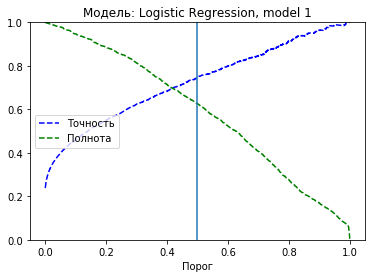

In [247]:
plot_precision_recall_vs_threshold(precisions_lr, recalls_lr, thresholds_lr, 'Logistic Regression, model 1')

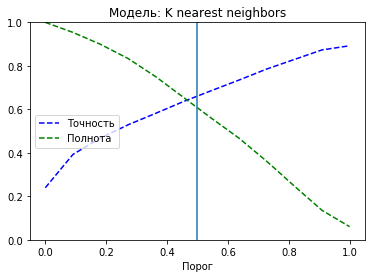

In [250]:
plot_precision_recall_vs_threshold(precisions_knn, recalls_knn, thresholds_knn, 'K nearest neighbors')

In [251]:
from sklearn.metrics import roc_auc_score, roc_curve

In [255]:
roc_auc_lr = np.round(roc_auc_score(y_test, y_prob_lr), 2)
roc_auc_knn = np.round(roc_auc_score(y_test, y_prob_knn), 2)
roc_auc_lr_2 = np.round(roc_auc_score(y_test, y_prob_lr_2), 2)
roc_auc_knn_2 = np.round(roc_auc_score(y_test, y_prob_knn_2), 2)
print("Roc_auc_score Logistic Regression, model 1: ", roc_auc_lr)
print("Roc_auc_score Logistic Regression, model 2: ", roc_auc_lr_2)
print("Roc_auc_score K nearest neighbors, model 1: ", roc_auc_knn)
print("Roc_auc_score K nearest neighbors, model 2: ", roc_auc_knn_2)

Roc_auc_score Logistic Regression, model 1:  0.91
Roc_auc_score Logistic Regression, model 2:  0.91
Roc_auc_score K nearest neighbors, model 1:  0.87
Roc_auc_score K nearest neighbors, model 2:  0.87


In [305]:
import matplotlib

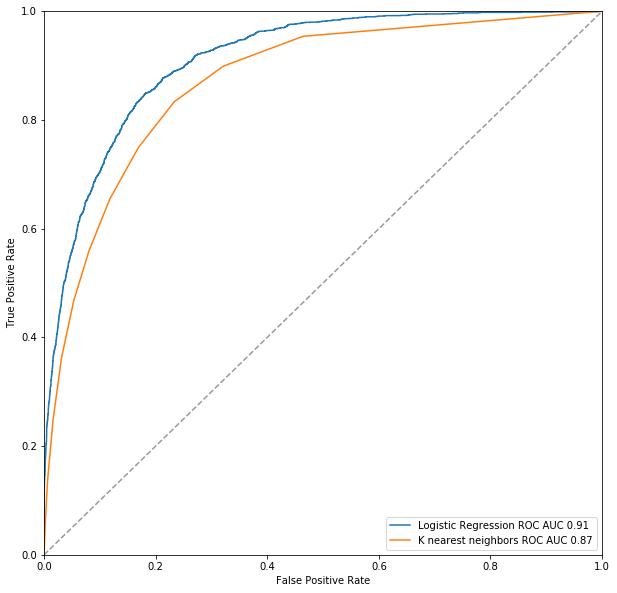

In [307]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression ROC AUC {roc_auc_lr}')
plt.plot(fpr_knn, tpr_knn, label=f'K nearest neighbors ROC AUC {roc_auc_knn}')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Попробуем посчитать производительность модели при вдвое меньшем количестве признаков.

In [284]:
# чтобы избежать утечки информации, отбор признаков и масштабирование будет
# осуществляться внутри перекрестной проверки. Отбор признаков будет 
# проводится с помощью рекурсивного удаления неважных признаков RFE, 
# использующего RandomForestClassifier для определения важности признаков.
np.random.seed(8)

location = '.\cachedir'
memory = Memory(location, verbose=10)

pipeline_lr_2 = Pipeline([
    ('feature_selection', RFE(RandomForestClassifier(n_estimators=10), n_features_to_select=20, step=10)),
    ('std_scaler', StandardScaler()),
    ('lr',  LogisticRegression(solver='liblinear'))], 
    memory
)

grid_lr_2 = {      
        'lr__C': np.logspace(-3, 3, 7),
        'lr__penalty': ['l1', 'l2'],
        }

grid_search_lr_2 = GridSearchCV(pipeline_lr_2, param_grid=grid_lr_2, cv=skf, scoring='f1', verbose=10, n_jobs=-1)

In [ ]:
grid_search_lr_2.fit(X_train, y_train)

In [286]:
top_features_lr_2 = X_train.columns[grid_search_lr_2.best_estimator_.named_steps['feature_selection'].support_]

In [287]:
top_features_df_2 = pd.DataFrame({'top_features_lr_2':top_features_lr_2})
top_features_df_2

,top_features_lr_2
0,fnlwgt
1,capital-gain
2,capital-loss
3,hours-per-week
4,workclass_Private
5,workclass_Self-emp-not-inc
6,education_Bachelors
7,education_HS-grad
8,education_Masters
9,education_Some-college


In [288]:
grid_search_lr_2.best_score_

0.6224998080322277

In [289]:
grid_search_lr_2.best_params_

{'lr__C': 1.0, 'lr__penalty': 'l2'}

In [290]:
results_lr_2 = grid_search_lr_2.cv_results_

In [291]:
score_keys_lr_2 = [key for key in results_lr_2.keys() if 'split' in key and 'test' in key]

In [292]:
params_dct_lr_2 = {'cv_result_'+str(i): result for i, result in enumerate(
    np.array([results_lr_2[score] for score in score_keys_lr_2]))}

In [293]:
params_dct_lr_2['model_params'] = results_lr_2['params']

In [294]:
results_df_lr_2 = pd.DataFrame(params_dct_lr_2)

In [295]:
results_df_lr_2['mean_result'] = results_df_lr_2.mean(axis=1)
results_df_lr_2['std_result'] = results_df_lr_2.std(axis=1)

In [296]:
results_df_lr_2.sort_values('mean_result', ascending=False).head(5)

,cv_result_0,cv_result_1,cv_result_2,cv_result_3,cv_result_4,model_params,mean_result,std_result
7,0.636281,0.600248,0.620795,0.639132,0.616041,"{'lr__C': 1.0, 'lr__penalty': 'l2'}",0.622499,0.014186
13,0.635894,0.600248,0.620373,0.639132,0.616463,"{'lr__C': 1000.0, 'lr__penalty': 'l2'}",0.622422,0.014086
6,0.635894,0.600248,0.620795,0.639132,0.616041,"{'lr__C': 1.0, 'lr__penalty': 'l1'}",0.622422,0.014112
8,0.635894,0.600248,0.620373,0.639132,0.616041,"{'lr__C': 10.0, 'lr__penalty': 'l1'}",0.622338,0.014123
9,0.635894,0.600248,0.620373,0.639132,0.616041,"{'lr__C': 10.0, 'lr__penalty': 'l2'}",0.622338,0.014123


In [297]:
# сравним производительность первых двух по результативности моделей, полученных с помощью
# перекрестной проверки.
model_lr_2 = grid_search_lr_2.best_estimator_

In [298]:
y_pred_lr_2 = model_lr_2.predict(X_test)
y_prob_lr_2 = model_lr_2.predict_proba(X_test)[:, 1]

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [299]:
print(f'Доля правильных предсказаний: {accuracy_score(y_test, y_pred_lr_2):.5f}')

Доля правильных предсказаний: 0.84359


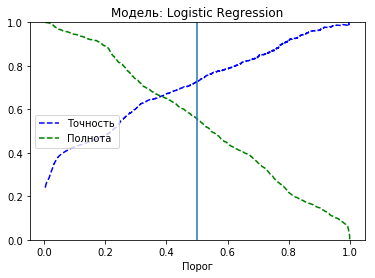

In [300]:
precisions_lr_2, recalls_lr_2, thresholds_lr_2 = precision_recall_curve(y_test, y_prob_lr_2)
plot_precision_recall_vs_threshold(precisions_lr_2, recalls_lr_2, thresholds_lr_2, 'Logistic Regression')

In [301]:
roc_auc_lr_2 = np.round(roc_auc_score(y_test, y_prob_lr_2), 2)
print("Roc_auc_score Logistic Regression: ", roc_auc_lr_2)

Roc_auc_score Logistic Regression:  0.89


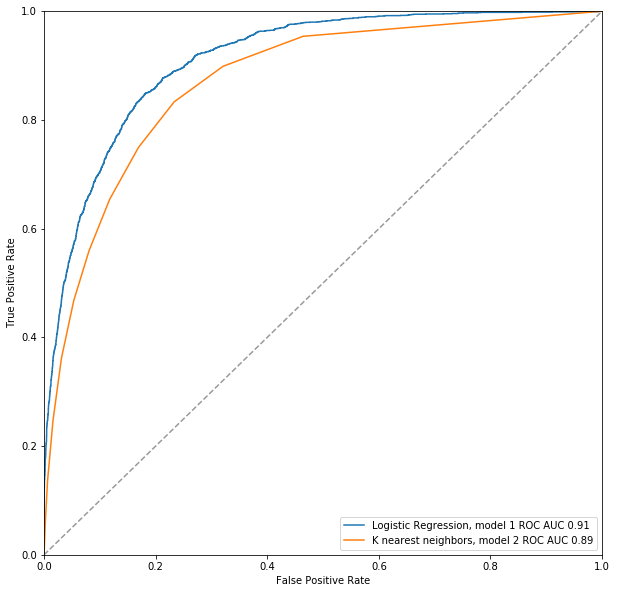

In [308]:
fpr_lr_2, tpr_lr_2, thresholds_lr_2 = roc_curve(y_test, y_prob_lr_2)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression, model 1 ROC AUC {roc_auc_lr}')
plt.plot(fpr_knn, tpr_knn, label=f'K nearest neighbors, model 2 ROC AUC {roc_auc_lr_2}')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Как видно, при уменьшении количества признаков в 2 раза - производительность модели немного снизилась.